In [1]:
import rlrom.utils as rlu
import polars as pl
import rlrom.plots as rlp
from rlrom.testers import RLTester
import matplotlib.pyplot as plt


2025-10-19 21:34:28.461801: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-19 21:34:28.494699: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-19 21:34:29.374554: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical 

# Normal vs Right Lane

In [2]:
cfg0 = rlu.load_cfg('cfg0tr_with_obs.yml')
df0 = rlu.get_df_training(cfg0,2)
cfg1 = rlu.load_cfg('cfg0tr_right_lane_with_obs.yml')
df1 = rlu.get_df_training(cfg1,-2)

Imported module highway
loading field [ cfg_env ] from YAML file [ cfg_env.yml ]
loading field [ cfg_specs ] from YAML file [ cfg_specs_with_obs.yml ]
loading field [ specs ] from STL file [ hw-env_specs.stl ]
loading field [ eval_formulas ] from YAML file [ cfg_eval.yml ]
loading field [ ppo ] from YAML file [ highway_env_ppo.yml ]
Imported module highway
Imported module highway
loading field [ cfg_env ] from YAML file [ cfg_env.yml ]
loading field [ cfg_specs ] from YAML file [ cfg_specs_right_lane_with_obs.yml ]
loading field [ specs ] from STL file [ hw-env_specs.stl ]
loading field [ eval_formulas ] from YAML file [ cfg_eval.yml ]
loading field [ ppo ] from YAML file [ highway_env_ppo.yml ]
Imported module highway


/home/alex/workspace/rlrom/.venv/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


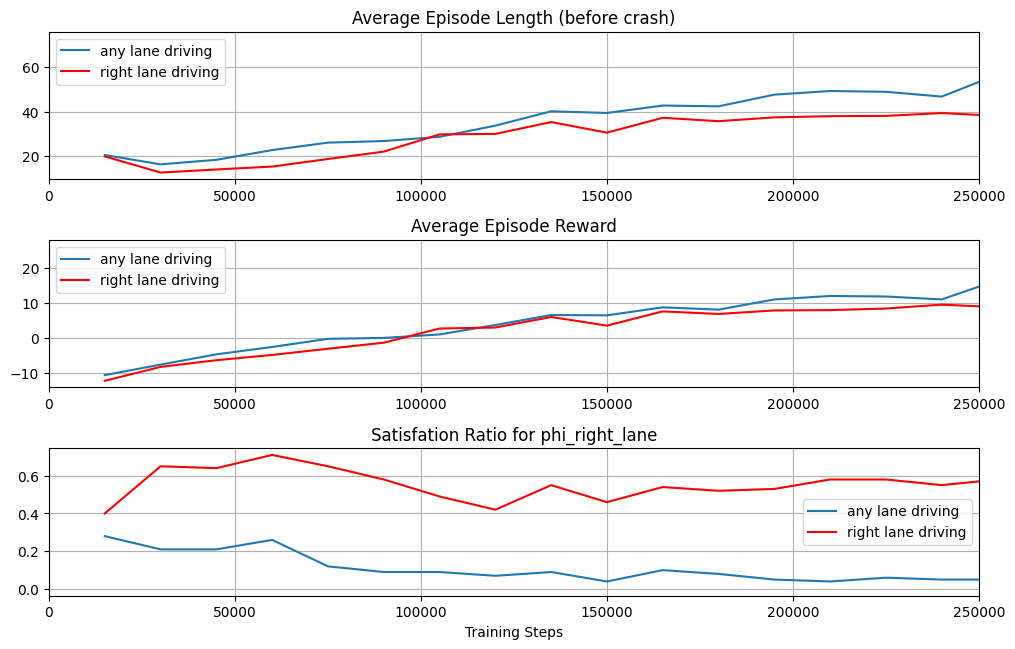

In [30]:
#_, ax = plt.subplots(figsize=(12, 8))
plt.figure(figsize=(12,8))
ax = plt.subplot(12,1,(1,3))
rlp.plot_df_training(df0,metric='mean_ep_len', label='any lane driving', ax=ax)
rlp.plot_df_training(df1,metric='mean_ep_len', label='right lane driving', color='red', ax=ax)
ax.grid(True)
plt.title('Average Episode Length (before crash)')
ax.set_xlim((0,250000))
ax.set_ylabel(None)
ax.set_xlabel(None)

ax = plt.subplot(12,1,(5,7))
ax = rlp.plot_df_training(df0,metric='mean_ep_rew', label='any lane driving', ax=ax)
rlp.plot_df_training(df1,metric='mean_ep_rew', label='right lane driving', color='red', ax=ax)
plt.title('Average Episode Reward')
ax.set_xlim((0,250000))
ax.grid(True)
ax.set_ylabel(None)
ax.set_xlabel(None)

ax = plt.subplot(12,1,(9,11))
ax = rlp.plot_df_training(df0,formula= 'phi_right_lane', metric='ratio_init_sat', label='any lane driving',ax=ax)
rlp.plot_df_training(df1,formula= 'phi_right_lane',metric='ratio_init_sat', label='right lane driving', color='red', ax=ax)
plt.title('Satisfation Ratio for phi_right_lane')
ax.set_xlim((0,250000))
ax.set_ylabel(None)
ax.grid(True)

plt.savefig('right_lane_training.pdf',bbox_inches='tight')

# Retesting

In [ ]:
cfg_wo= 'cfg0tr_with_obs.yml'
Two = RLTester(cfg_wo)
Two.retest_checkoints_models(df_idx=0, num_ep=100)
Two.retest_checkoints_models(df_idx=1, num_ep=100)
Two.retest_checkoints_models(df_idx=2, num_ep=100)


cfg_basic= 'cfg0tr.yml'
T = RLTester(cfg_basic)
T.retest_checkoints_models(df_idx=1, num_ep=100)
T.retest_checkoints_models(df_idx=2, num_ep=100)
T.retest_checkoints_models(df_idx=3, num_ep=100)



In [ ]:
#cfg = rlu.load_cfg('cfg0tr_with_obs.yml')
cfgt = rlu.set_rec_cfg_field(cfg, num_ep=5,render_mode='human')
T = RLTester(cfgt)
Tres = T.run_cfg_test()
